In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
import os

In [42]:
dataset = MNIST_Polygon('~/Developer/datasets')


In [48]:
1 2 3 4
5 6 7 8

SyntaxError: invalid syntax (<ipython-input-48-fc8449dc0960>, line 1)

In [3]:
class MNIST_Polygon(datasets.MNIST):
    
    def __init__(self, path, train=True, download=False, transform = None):
        super().__init__(root=path, train=train, download=download)
        
        data = self.data.view(-1, 784)
        data = list(data.unbind())
        data = [torch.arange(784)[(x > 0.8)] for x in data]
        lengths = [len(x) for x in data]
        max_length = max(lengths)
        data = [torch.Tensor(list(x) + (351 - len(x)) * [0]) for x in data]
        data = torch.stack(data).contiguous()
        self.data = torch.reshape(data, (len(data) , 1, 351))
        self.max_length = max_length
        
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x, y
    
    

        
        
    @property
    def raw_folder(self):
        return os.path.join(self.root, 'MNIST', 'raw')

    @property
    def processed_folder(self):
        return os.path.join(self.root, 'MNIST', 'processed')

In [4]:
s = MNIST_Polygon('~/Developer/datasets')

In [240]:
s[1]

(tensor([[127., 128., 129., 130., 131., 154., 155., 156., 157., 158., 159., 181.,
          182., 183., 184., 185., 186., 187., 188., 189., 207., 208., 209., 210.,
          211., 212., 213., 214., 215., 216., 217., 235., 236., 237., 238., 239.,
          240., 241., 242., 243., 244., 245., 262., 263., 264., 265., 266., 267.,
          268., 269., 270., 271., 272., 273., 289., 290., 291., 292., 293., 294.,
          295., 296., 297., 300., 301., 302., 316., 317., 318., 319., 320., 321.,
          328., 329., 330., 343., 344., 345., 346., 347., 348., 349., 356., 357.,
          358., 371., 372., 373., 374., 384., 385., 386., 399., 400., 401., 412.,
          413., 414., 426., 427., 428., 429., 440., 441., 442., 454., 455., 456.,
          457., 466., 467., 468., 469., 470., 482., 483., 484., 493., 494., 495.,
          496., 497., 510., 511., 512., 520., 521., 522., 523., 538., 539., 540.,
          547., 548., 549., 550., 566., 567., 568., 569., 570., 571., 572., 573.,
          574., 

In [219]:
x, y = s[1]
print(y)

tensor(0)


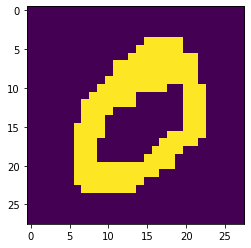

In [35]:
img = torch.zeros(784)
img[x.long()] = 1.0
img = img.view(28, 28)
plt.imshow(img)

In [54]:
len(x)

176

In [63]:
s

Dataset MNIST_Polygon
    Number of datapoints: 60000
    Root location: /Users/davemeijdam/Developer/datasets
    Split: Train

In [25]:
x // 28

tensor([ 5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,
         8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10.,
        10., 10., 11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12.,
        12., 12., 13., 13., 13., 13., 13., 13., 13., 13., 13., 14., 14., 14.,
        14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 17., 17.,
        17., 18., 18., 18., 19., 19., 19., 20., 20., 20., 21., 21., 21., 22.,
        22., 22., 23., 23., 23., 24., 24., 24.])

In [26]:
x % 28

tensor([20., 21., 22.,  4.,  5., 20., 21., 22.,  4.,  5., 19., 20., 21., 22.,
         4.,  5., 19., 20., 21.,  4.,  5., 19., 20., 21.,  3.,  4.,  5., 19.,
        20., 21.,  3.,  4.,  5., 18., 19., 20., 21.,  3.,  4.,  5., 18., 19.,
        20., 21.,  3.,  4.,  5., 15., 16., 17., 18., 19., 20.,  3.,  4.,  5.,
         9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.,  3.,  4.,
         5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.,
        19.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 17., 18., 19., 17., 18.,
        19., 17., 18., 19., 17., 18., 19., 17., 18., 19., 17., 18., 19., 17.,
        18., 19., 17., 18., 19., 17., 18., 19.])

In [97]:
len(x)

176

In [101]:
torch.Tensor(list(x) + 608 * [0])

tensor([127., 128., 129., 130., 131., 154., 155., 156., 157., 158., 159., 181.,
        182., 183., 184., 185., 186., 187., 188., 189., 207., 208., 209., 210.,
        211., 212., 213., 214., 215., 216., 217., 235., 236., 237., 238., 239.,
        240., 241., 242., 243., 244., 245., 262., 263., 264., 265., 266., 267.,
        268., 269., 270., 271., 272., 273., 289., 290., 291., 292., 293., 294.,
        295., 296., 297., 300., 301., 302., 316., 317., 318., 319., 320., 321.,
        328., 329., 330., 343., 344., 345., 346., 347., 348., 349., 356., 357.,
        358., 371., 372., 373., 374., 384., 385., 386., 399., 400., 401., 412.,
        413., 414., 426., 427., 428., 429., 440., 441., 442., 454., 455., 456.,
        457., 466., 467., 468., 469., 470., 482., 483., 484., 493., 494., 495.,
        496., 497., 510., 511., 512., 520., 521., 522., 523., 538., 539., 540.,
        547., 548., 549., 550., 566., 567., 568., 569., 570., 571., 572., 573.,
        574., 575., 576., 577., 578., 59

In [39]:
z = []
for a in x:
    z.append((int(a // 28), int(a % 28)))
    
torch.Tensor(z)

tensor([[ 4., 15.],
        [ 4., 16.],
        [ 4., 17.],
        [ 4., 18.],
        [ 4., 19.],
        [ 5., 14.],
        [ 5., 15.],
        [ 5., 16.],
        [ 5., 17.],
        [ 5., 18.],
        [ 5., 19.],
        [ 6., 13.],
        [ 6., 14.],
        [ 6., 15.],
        [ 6., 16.],
        [ 6., 17.],
        [ 6., 18.],
        [ 6., 19.],
        [ 6., 20.],
        [ 6., 21.],
        [ 7., 11.],
        [ 7., 12.],
        [ 7., 13.],
        [ 7., 14.],
        [ 7., 15.],
        [ 7., 16.],
        [ 7., 17.],
        [ 7., 18.],
        [ 7., 19.],
        [ 7., 20.],
        [ 7., 21.],
        [ 8., 11.],
        [ 8., 12.],
        [ 8., 13.],
        [ 8., 14.],
        [ 8., 15.],
        [ 8., 16.],
        [ 8., 17.],
        [ 8., 18.],
        [ 8., 19.],
        [ 8., 20.],
        [ 8., 21.],
        [ 9., 10.],
        [ 9., 11.],
        [ 9., 12.],
        [ 9., 13.],
        [ 9., 14.],
        [ 9., 15.],
        [ 9., 16.],
        [ 9., 17.],


In [15]:
batch_size = 64
test_batch_size = 1000
epochs = 14
lr = 0.001
gamma = 0.7
log_interval = 10
dry_run = False
save_model = False


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, 5),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Conv1d(32, 64, 5),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Dropout(0.25)
        )
        
        self.linear = nn.Sequential(
            nn.Linear(10944, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )
        
        
#         self.conv1 = nn.Conv2d(1, 32, 3, 1)
#         self.conv2 = nn.Conv2d(32, 64, 3, 1)
#         self.dropout1 = nn.Dropout(0.25)
#         self.dropout2 = nn.Dropout(0.5)
#         self.fc1 = nn.Linear(9216, 128)
#         self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)
#         x = self.dropout1(x)
#         x = torch.flatten(x, 1)
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.dropout2(x)
#         x = self.fc2(x)


        x = self.conv(x)
        x = torch.flatten(x, 1)
        return self.linear(x)
#         output = F.log_softmax(x, dim=1)
#         return output
summary(Net(), (1,351))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 347]             192
       BatchNorm1d-2              [-1, 32, 347]              64
              ReLU-3              [-1, 32, 347]               0
            Conv1d-4              [-1, 64, 343]          10,304
       BatchNorm1d-5              [-1, 64, 343]             128
              ReLU-6              [-1, 64, 343]               0
         MaxPool1d-7              [-1, 64, 171]               0
           Dropout-8              [-1, 64, 171]               0
            Linear-9                  [-1, 128]       1,400,960
             ReLU-10                  [-1, 128]               0
          Dropout-11                  [-1, 128]               0
           Linear-12                   [-1, 10]           1,290
Total params: 1,412,938
Trainable params: 1,412,938
Non-trainable params: 0
---------------------------

In [16]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    criterion = nn.CrossEntropyLoss()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()), end="\r")
            if dry_run:
                break


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    criterion = nn.CrossEntropyLoss(reduction='sum')
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.1f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [17]:
def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')

    device = "cpu"

    train_kwargs = {'batch_size': batch_size}
    test_kwargs = {'batch_size': test_batch_size}

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    dataset1 = MNIST_Polygon('~/Developer/datasets', train=True, download=True, transform=transform)
    dataset2 = MNIST_Polygon('~/Developer/datasets', train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    model = Net().to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()

    if save_model:
        torch.save(model.state_dict(), "mnist_cnn.pt")
        
main()

Train Epoch: 1 [59520/60000 (99%)]	Loss: 0.782754
Test set: Average loss: 1.4702, Accuracy: 4573/10000 (45.7%)

Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.642554
Test set: Average loss: 0.7444, Accuracy: 7432/10000 (74.3%)

Train Epoch: 3 [59520/60000 (99%)]	Loss: 0.658525
Test set: Average loss: 0.8952, Accuracy: 7039/10000 (70.4%)

Train Epoch: 4 [59520/60000 (99%)]	Loss: 0.562247
Test set: Average loss: 1.3609, Accuracy: 6126/10000 (61.3%)

Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.452403
Test set: Average loss: 0.7598, Accuracy: 7524/10000 (75.2%)

Train Epoch: 6 [59520/60000 (99%)]	Loss: 0.373842
Test set: Average loss: 0.5971, Accuracy: 7978/10000 (79.8%)

Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.366090
Test set: Average loss: 0.5972, Accuracy: 8007/10000 (80.1%)

Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.403855
Test set: Average loss: 0.6202, Accuracy: 7938/10000 (79.4%)

Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.352463
Test set: Average loss: 0.5014, Accuracy: 8287/10000 (

In [213]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
dataset1 = MNIST_Polygon('~/Developer/datasets', train=True, download=True, transform=transform)
dataset2 = MNIST_Polygon('~/Developer/datasets', train=False, transform=transform)

In [215]:
dataset2.data.shape

torch.Size([10000, 1, 311])